# CS110 Spring 2020- Assignment 1
# Divide and Conquer Sorting Algorithms


This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 


## Question 1. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort algorithm discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list.**

In [1]:
import math
import numpy as np
       
    
def three_way_merge(arr):
    """Implements three-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""  
    
    ## YOUR CODE HERE
    
    # turn the array into a list (make sure that all functions work for either np.array and lists)
    if type(arr)==np.ndarray:
        arr=arr.tolist()
        
    # subdivide the array up until it has length of 1
    if len(arr) > 1:
                
        # sorting if there are only two elements (as the comparison below only works for 3)
        if len(arr)==2:
            if arr[0]>arr[1]:
                arr[1],arr[0]=arr[0],arr[1]
            return arr
        
        # creating three subarrays    
        size=math.floor(len(arr)//3)
        
        array1=arr[:size]
        array2=arr[size:2*size]
        array3=arr[2*size:] # third array will always be the largest if there is uneven length
        
        # calling recursively each of them
        three_way_merge(array1)           
        three_way_merge(array2)
        three_way_merge(array3)
                
        # include sentinel
        array1.append(float("inf"))
        array2.append(float("inf"))
        array3.append(float("inf"))

        # setting parameters for loop
        i,j,k,index=0,0,0,0
        
        # comparing
        while index < len(arr): 
            if array1[i] <= array2[j] and array1[i] <= array3[k]: # array 1 is largest
                arr[index] = array1[i] 
                i+=1
            elif array2[j] <= array1[i] and array2[j] <= array3[k]: # array 2 is largest
                arr[index] = array2[j] 
                j+=1
            else:
                arr[index] = array3[k] # array 3 is largest
                k+=1
            index+=1

    return arr

In [2]:
## tests
assert(three_way_merge([54,26])==[26, 54])
assert(three_way_merge(np.array([5,4,3,2,1]))==[1, 2, 3, 4, 5])
assert(three_way_merge([1,1,1])==[1,1,1])
assert(three_way_merge([54])==[54])

In [3]:
assert(three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

## Question 3. [#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique]¶
Implement a second version of a three-way merge sort that calls bubble sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify on the basis of theoretical and potentially also experimental arguments what might be an appropriate threshold for the input array for applying bubble sort.

In [4]:
def extended_three_way_merge(arr):
    """Implements the second version of a three-way merge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    # YOUR CODE HERE
    
    # turn the array into a list (make sure that all functions work for either np.array and lists)
    if type(arr)==np.ndarray:
            arr=arr.tolist()
    
    # subdivide the array up until it has length of 1
    if len(arr) > 1:
        
        # implementing the bubble sort for subarray equal or smaller than 3
        if len(arr) <=3:
                index_bubble,break_bubble=0,len(arr)
                while break_bubble > 1:
                    for index_bubble in range(break_bubble-1):
                        if arr[index_bubble] > arr[index_bubble +1]:
                            arr[index_bubble], arr[index_bubble +1] =arr[index_bubble +1],arr[index_bubble]
                            index_bubble += 1
                    break_bubble =break_bubble-1
        
        # creating three subarrays    
        size=math.floor(len(arr)//3)
        
        array1=arr[:size]
        array2=arr[size:2*size]
        array3=arr[2*size:] # third array will always be the largest if there is uneven length
        
        # calling recursively each of them
        three_way_merge(array1)           
        three_way_merge(array2)
        three_way_merge(array3)
                
        # include sentinel
        array1.append(float("inf"))
        array2.append(float("inf"))
        array3.append(float("inf"))

        # setting parameters for loop
        i,j,k,index=0,0,0,0
        
        # comparing and merging
        while index < len(arr): 
            if array1[i] <= array2[j] and array1[i] <= array3[k]: # array 1 is largest
                arr[index] = array1[i] 
                i+=1
            elif array2[j] <= array1[i] and array2[j] <= array3[k]: # array 2 is largest
                arr[index] = array2[j] 
                j+=1
            else:
                arr[index] = array3[k] # array 3 is largest
                k+=1
            index+=1
            
    return arr

In [5]:
assert(extended_three_way_merge([4,3,2,1]) == [1,2,3,4])
assert(extended_three_way_merge(np.array([4,3,2,1])) == [1,2,3,4]) 

**Explanation:** 

*The Complexity of Three Way Merge Sort*

There are two main steps in the three-way merge sort which can increase the order of growth of the algorithm: divide and conquer (or merging). 

The first part (dividing) is subdividing each of the three subarrays into the base case (which is 1). These steps can be explained as constantly dividing n (where n is the size of the array) by 3 (because we are doing a three way merge sort) to reach the base case. Because the operation we are doing here is a division, we can know that the operation is O(n). 

The next step is the merging. In this step, we are comparing all the indexes within the same subarray (which has the length of at least 3). It is easier to visualize the amount of comparisons we are doing if we take into account the three-way tree we build while doing the comparisons. The more "steps" we have, the more comparisons we will have to do. As the branches of the trees grow in a factor of three, we can know that the asymptotic behavior here can be explained by O(log n). 

Thus, uniting these two main steps we know that complexity of the three way merge sort is O(n log n).


*The Complexity of the Bubble Sort*

The bubble sort algorithm, on the other hand, is more spacious. Its worst case scenario is O(n^2). The way it works is that they compare each pair of elements in the array and updates the index of the comparison. Thus, we can express the worst case scenario as n(n-1), where (n-1) represents the amount of comparisons and n the amount of index. Thus, we can say that the bubble sort algorithm has O(n^2).


*Combining both*

Given that the bubble sort algorithm has a worse performance than the MergeSort, it makes sense that we set a small threshold (such as not to increase the complexity of the algorithm with larger n). In other words, as the complexity grows exponentially in the bubble sort, it is in our interest to not have a high threshold as it can quickly increase the complexity of the extended algorithm. I set the threshold to be equal or smaller than 3, because the bubble algorithm would make less comparisons in this case. 

It is easier to see that with an example of the worst case scenario. If we have an array of [3,2,1]:
- Bubble sort: There will be 3 comparisons in total and 3 swaps. In order, the comparisons will be: (3,2), (3,1), (2,1), with swaps being made in each one of them. 
- Three way mergesort: In this case, for The comparisons in order will be: 
    - for setting 1 as the A[1]:
        - for the first if: (3,2) AND (3,1), which is not true
        - for the second if: (2,3) AND (2,1), which is also not true
    - for setting 2 as the A[2]:
        - for the first if: (2,3) AND (2,infinity), which is true
    - for setting the 3 as A[3]: 
        - for the first if: (3,infinity), (3, infinity), which is also true.

Thus, there are 8 comparisons in the worst case of an array of length 3 in the MergeSort, as opposed to 3 comparisons in the 3 comparisons in the Bubble sort.
    

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an n-element array and the number of buckets, k, to be used during sorting.  Then, the algorithm distributes the elements of the input array into k-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

![alt text](bucket.png "Title")

The BucketSort code above calls the function GetBucketNum  (see the pseudocode below) to distribute all the elements of array A into k-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). GetBucketNum returns the bucket number that corresponds to element A[i].   It takes as inputs the element of the array, A[i], the max and min elements in A, the size of the intervals in every bucket (e.g., if you have numbers with values between  0 and 100 numbers and 5 buckets, every bucket has an interval of size 20 = [100-0]/5).  Notice that in pseudocode, the indices of the arrays are from 1 to n. Thus, GetBucketNum consistently returns a number between 1 and n (make sure you account for this in your Python program).

![alt text](getbucketnum.png "Title")

Write a Python 3 implementation of BucketSort that uses the **bubble sort algorithm for sorting the individual buckets in line 10 of the algorithm**.

In [6]:
import math

def bucket_sort(arr, k):
    """Implements BucketSort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    # YOUR CODE HERE
    
    # turn arrays in to list
    if type(arr)==np.ndarray:
            arr=arr.tolist()
    
    
    mn=min(arr) # minimum value of the array
    mx=max(arr) # maximum value of the array
    size= math.ceil((mx-mn)/k) #size of numerical interval for every bucket
    
    # tells which bucket an element belongs to 
    def GetBucketNum(a,mn,mx,size,k): 
        if a==mx:
            j=k
        elif a ==mn:
            j=1
        else:
            j=1
            while a>=mn+(size*j):
                j+=1
        return j
    
    # create the buckets
    buckets = [[] for _ in range(k)] # create empty buckets
    for i in range(len(arr)): 
        b= GetBucketNum(arr[i],mn,mx,size,k)
        buckets[b-1].append(arr[i])
    
    # sort the buckets using bubble sort
    i=0
    for i in range(k): # sorting each of the buckets separately
        index_bubble,break_bubble=0,len(buckets[i])
        while break_bubble > 1: 
            for index_bubble in range(break_bubble-1):
                if buckets[i][index_bubble] > buckets[i][index_bubble +1]:
                    buckets[i][index_bubble], buckets[i][index_bubble +1] =buckets[i][index_bubble +1],buckets[i][index_bubble]
                    index_bubble += 1
            break_bubble =break_bubble-1
    
    # concatenate the buckets
    total_lists = []
    for i in range(len(buckets)):
        total_lists = total_lists + buckets[i]
    
    return total_lists

In [7]:
bucket_sort([1,1,1,1], 2)

[1, 1, 1, 1]

In [8]:
bucket_sort([1,1,1,-4],1)

[-4, 1, 1, 1]

In [9]:
bucket_sort([1,1,1,3,3,3], 2)

[1, 1, 1, 3, 3, 3]

In [10]:
assert(bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability]

Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort apply the Bucket sort algorithm recursively until the size of the bucket is less than or equal to k, the base case (notice that fewer than k partitions will be inefficient).


In [11]:
def GetBucketNum(a,mn,mx,size,k): 
    if a==mx:
        j=k
    elif a==mn:
        j=1
    else:
        j=1
        while a>=mn+(size*j):
            j+=1
    return j

In [12]:
def BubbleSort(a):
    index_bubble,break_bubble=0,len(a)
    while break_bubble > 1: 
            for index_bubble in range(break_bubble-1):
                if a[index_bubble] > a[index_bubble +1]:
                    a[index_bubble], a[index_bubble +1] =a[index_bubble +1],a[index_bubble]
                    index_bubble += 1
            break_bubble=break_bubble-1
    return a

In [13]:
def extended_bucket_sort(arr, k):
    
    """Implements the second version of the BucketSort algorithm
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    k: int, number of buckets
    
    Output: a sorted Python list"""
    
    # YOUR CODE HERE
    
    # turn arrays in to list
    if type(arr)==np.ndarray:
        arr=arr.tolist()
        
    total_list=[]
        
    def new_bucket_sort(arr,k):
        if len(arr) > k and k > 1:

            mn=min(arr) # minimum value of the array
            mx=max(arr) # maximum value of the array
            size= math.ceil((mx-mn)/k) #size of numerical interval for every bucket

            b_list=[]
            # create the buckets
            buckets = [[] for _ in range(k)] # create empty buckets
            for i in range(len(arr)): 
                b= GetBucketNum(arr[i],mn,mx,size,k)
                b_list.append(b)
                buckets[b-1].append(arr[i])
            
            # verify whether all the elements are being input in the same bucket (edge case)
            # if so, bubble sort it all
            check=len(b_list)-1
            while check > 0:
                if b_list[check] == b_list[(check-1)]:
                    check = check-1
                    if check == 0:
                        return total_list.extend(BubbleSort(arr))
                else:
                    check=-1

            # calling bucket_sort recursively within each bucket
            j=0
            for j in range(k):
                previous_buckets = buckets[j]
                buckets[j] = new_bucket_sort(buckets[j],k)
                
        # conquering/sorting + concatenating         
        else:
            total_list.extend(BubbleSort(arr))
        
    new_bucket_sort(arr,k)
    
    return total_list

In [14]:
assert(extended_bucket_sort([1,1,1,3,3,3], 2)==[1,1,1,3,3,3])
assert(extended_bucket_sort([4,3,2,1], 1) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 1) == [1,2,3,4])
assert(extended_bucket_sort([4,3,2,1], 3) == [1,2,3,4])
assert(extended_bucket_sort(np.array([4,3,2,1]), 3) == [1,2,3,4])

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the augmented merge sort from (3) by producing a plot that illustrates how every running time grows with input size. Make sure to:

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.

In [15]:
    
def two_way_merge(arr):
    """Implements two-way marge sort
    
    Input:
    arr: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""  
    
    ## YOUR CODE HERE
    
    # turn the array into a list (make sure that all functions work for either np.array and lists)
    if type(arr)==np.ndarray:
        arr=arr.tolist()
        
    # subdivide the array up until it has length of 1
    if len(arr) > 1:

        # creating three subarrays    
        size=math.floor(len(arr)//2)
        
        array1=arr[:size]
        array2=arr[size:]
        
        # calling recursively each of them
        two_way_merge(array1)           
        two_way_merge(array2)
 
        # include sentinel
        array1.append(float("inf"))
        array2.append(float("inf"))

        # setting parameters for loop
        i,j,index=0,0,0
        
        # comparing
        while index < len(arr): 
            if array1[i] <= array2[j]: # element of array 1 is largest
                arr[index] = array1[i] 
                i+=1
            else:
                arr[index] = array2[j] # array 3 is largest
                j+=1
            index+=1

    return arr

In [16]:
assert(two_way_merge([5,4,3,2,1])==[1, 2, 3, 4, 5])
assert(two_way_merge([1,1,1,1])==[1,1,1,1])
assert(two_way_merge([4,3,2,1]) == [1,2,3,4])
assert(two_way_merge(np.array([4,3,2,1])) == [1,2,3,4])

In [17]:
from random import randint

test1=[1]

test2=[]
for i in range(10):
    test2.append(randint(-100,100))

test3=[]
for i in range(100):
    test3.append(randint(-100,100))
    
test4=[]
for i in range(1000):
    test4.append(randint(-100,100))

test5=[]
for i in range(10000):
    test5.append(randint(-100,100))    
    

test6=[]
for i in range(100000):
    test6.append(randint(-100,100))  
    
tests=[]
tests.append(test1)
tests.append(test2)
tests.append(test3)
tests.append(test4)
tests.append(test5)
tests.append(test6)

In [18]:
import time
import matplotlib.pyplot as plt

# two way merge sort
two_way_time=[]

for i in range(len(tests)):
    start_two_way = time.time()
    two_way_merge(tests[i])
    elapsed_two_way = time.time()- start_two_way
    two_way_time.append(elapsed_two_way)
    
# three way merge sort
three_way_time=[]

for i in range(len(tests)):
    start_three_way = time.time()
    three_way_merge(tests[i])
    elapsed_three_way = time.time()- start_three_way
    three_way_time.append(elapsed_three_way)
    
# extended three way merge sort
extended_three_way_time=[]

for i in range(len(tests)):
    start_extended_three_way = time.time()
    extended_three_way_merge(tests[i])
    elapsed_extended_three_way = time.time()- start_extended_three_way
    extended_three_way_time.append(elapsed_extended_three_way)


Bad key "text.kerning_factor" on line 4 in
/Users/juminichelli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


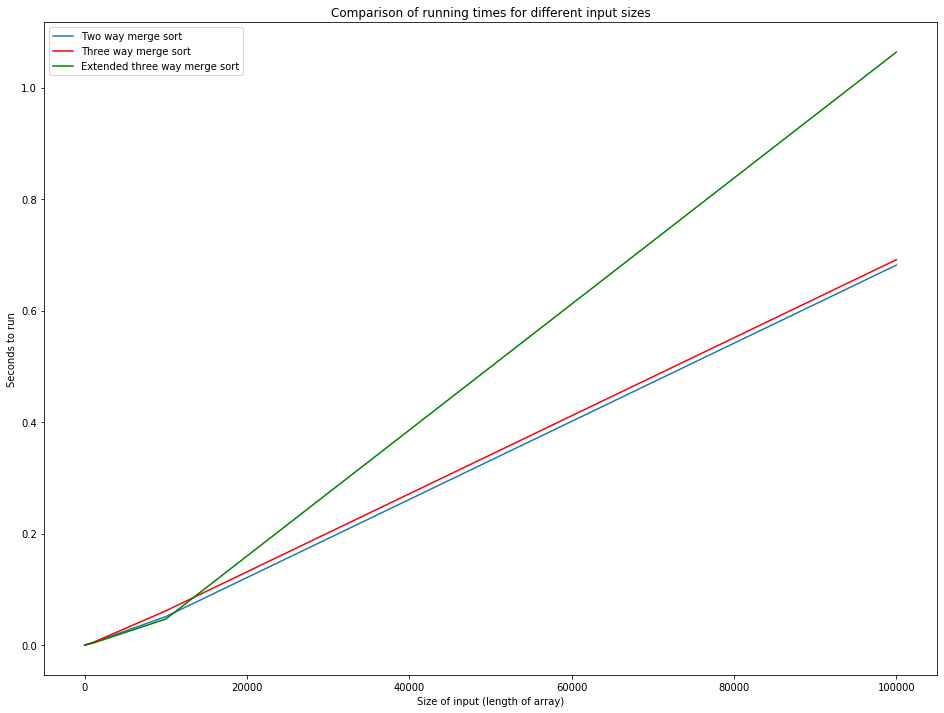

In [19]:
plt.figure(figsize=(16,12))
plt.title('Comparison of running times for different input sizes')
x=[len(tests[0]), len(tests[1]),len(tests[2]),len(tests[3]),len(tests[4]), len(tests[5])]
plt.plot(x,two_way_time,label='Two way merge sort')
plt.plot(x,three_way_time, color='red',label='Three way merge sort')
plt.plot(x,extended_three_way_time, color='green',label='Extended three way merge sort')
plt.legend()
plt.xlabel('Size of input (length of array)')
plt.ylabel('Seconds to run')
plt.show()

**Analysis:**

*Two way merge sort*: The algorithm complexity of a two way merge sort is O(n log n), as studied in class. The n comes from the divide steps, and the conquer comes from the merging step (as the number of comparisons increase exponentially).

*Three way merge sort*: Similar with the two way merge sort, the algorithm complexity is O(n log n), as previously described. The only difference between both is the base of the log. In two way merge sort, the divide step (which yields the log in the Big O notation) is on base 2, as it is a two way merge sort, whereas in this case, the base of the log is 3. This explains why the three way merge sorts executes faster given the same amount of inputs.

*Augmented merge sort:* The augmented three way merge sort does not have a much more different complexity than three way merge sort. As explained previously, it only implements less comparisons than it would have been in three way merge sort, which explains why it performs slightly better than the three way merge sort for larger input sizes.

It is important to acknowledge that the graph seems to be linear, but we would expect the relationship to be less linear and to look more like a logarithmic function. It is also important to acknowledge that this is not the average performance given input size, as we are randomly creating inversely ordered arrays. 

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort, and extended_bucket_sort by producing a plot that illustrates how the algorithms' runtimes depend on both the input size and the nature of the input (e.g., totally randomized inputs vs inversely sorted inputs). Make sure to:

1. define what each algorithm's complexity is in terms of the BigO notation
2. enumerate the explicit assumptions made to assess each algorithm's run time
3. analyze the running times on inputs of at least three different natures
4. and compare your benchmarks with the theoretical result we have discussed in class.

In [20]:
# INVERSELY SORTED ARRAYS
from random import randint

inverse_list1=[]
initial_value_1 = randint(0,1000)
for i in range(100):
    inverse_list1.append(initial_value_1)
    initial_value_1 -=1

inverse_list2=[]
initial_value_2 = randint(0,1000)
for i in range(1000):
    inverse_list2.append(initial_value_2)
    initial_value_2 -=1

inverse_list3=[]
initial_value_3 = randint(0,1000)
for i in range(10000):
    inverse_list3.append(initial_value_3)
    initial_value_3 -=1
    
inverse_lists=[]
inverse_lists.append(inverse_list1)
inverse_lists.append(inverse_list2)
inverse_lists.append(inverse_list3)

In [21]:
# two way merge sort
two_way_time=[]

for i in range(len(inverse_lists)):
    start_two_way = time.time()
    two_way_merge(inverse_lists[i])
    elapsed_two_way = time.time()- start_two_way
    two_way_time.append(elapsed_two_way)

In [22]:
# bucket sort, k=10
bucket_time_10=[]

for i in range(len(inverse_lists)):
    start_bucket_sort_10 = time.time()
    bucket_sort(inverse_lists[i],10)
    elapsed_bucket_sort_10 = time.time()- start_bucket_sort_10
    bucket_time_10.append(elapsed_bucket_sort_10)

In [23]:
# bucket sort, k=100
bucket_time_100=[]

for i in range(len(inverse_lists)):
    start_bucket_sort_100 = time.time()
    bucket_sort(inverse_lists[i],100)
    elapsed_bucket_sort_100 = time.time()- start_bucket_sort_100
    bucket_time_100.append(elapsed_bucket_sort_100)

In [24]:
# extended bucket sort, k=10
extended_bucket_time_10=[]

for i in range(len(inverse_lists)):
    start_extended_bucket_sort_10 = time.time()
    extended_bucket_sort(inverse_lists[i],10)
    elapsed_extended_bucket_sort_10 = time.time() - start_extended_bucket_sort_10
    extended_bucket_time_10.append(elapsed_extended_bucket_sort_10)

In [25]:
# extended bucket sort, k=100
extended_bucket_time_100=[]

for i in range(len(inverse_lists)):
    start_extended_bucket_sort_100 = time.time()
    extended_bucket_sort(inverse_lists[i],100)
    elapsed_extended_bucket_sort_100 = time.time() - start_extended_bucket_sort_100
    extended_bucket_time_100.append(elapsed_extended_bucket_sort_100)

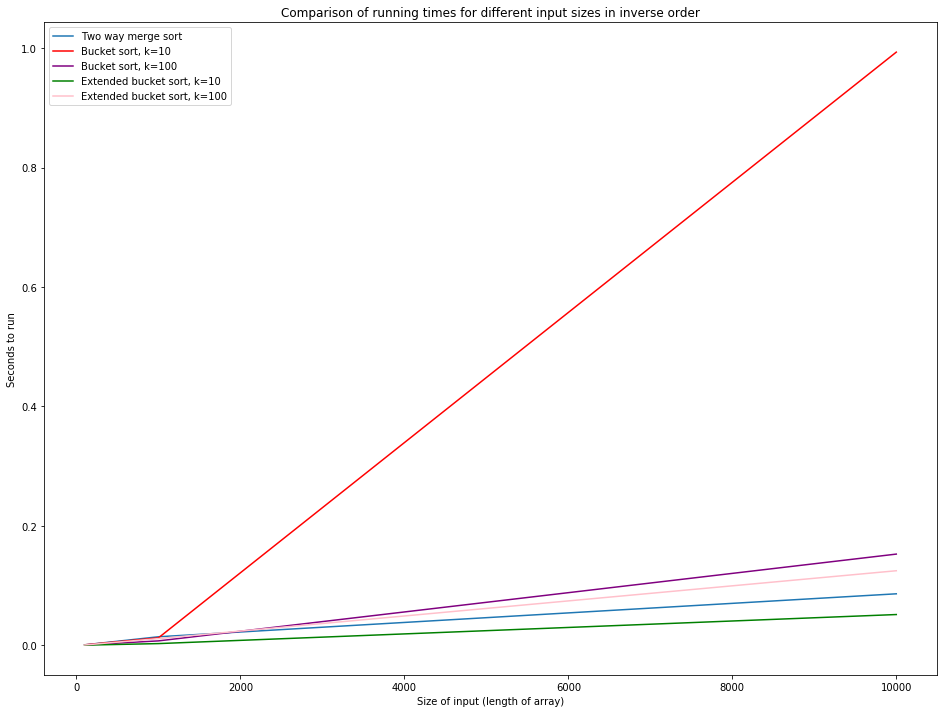

In [26]:
plt.figure(figsize=(16,12))
plt.title('Comparison of running times for different input sizes in inverse order')
x=[len(inverse_lists[0]), len(inverse_lists[1]),len(inverse_lists[2])]
plt.plot(x,two_way_time,label='Two way merge sort')
plt.plot(x,bucket_time_10, color='red',label='Bucket sort, k=10')
plt.plot(x,bucket_time_100, color='purple',label='Bucket sort, k=100')
plt.plot(x,extended_bucket_time_10, color='green',label='Extended bucket sort, k=10')
plt.plot(x,extended_bucket_time_100, color='pink',label='Extended bucket sort, k=100')
plt.legend()
plt.xlabel('Size of input (length of array)')
plt.ylabel('Seconds to run')
plt.show()

In [27]:
# RANDOM ARRAYS
from random import randint

random_list1=[]
for i in range(100):
    random_list1.append(randint(-100,100))

random_list2=[]
for j in range(1000):
    random_list2.append(randint(-100,100))

random_list3=[]
for k in range(10000):
    random_list3.append(randint(-100,100))
    
random_lists=[]
random_lists.append(random_list1)
random_lists.append(random_list2)
random_lists.append(random_list3)

In [28]:
##--- FOR INVERSELY SORTED

import time
import matplotlib.pyplot as plt

# two way merge sort
two_way_time=[]

for i in range(len(random_lists)):
    start_two_way = time.time()
    two_way_merge(random_lists[i])
    elapsed_two_way = time.time()- start_two_way
    two_way_time.append(elapsed_two_way)

In [29]:
# bucket sort, k=10
bucket_time_10=[]

for i in range(len(random_lists)):
    start_bucket_sort_10 = time.time()
    bucket_sort(random_lists[i],10)
    elapsed_bucket_sort_10 = time.time()- start_bucket_sort_10
    bucket_time_10.append(elapsed_bucket_sort_10)

In [30]:
# bucket sort, k=100
bucket_time_100=[]

for i in range(len(random_lists)):
    start_bucket_sort_100 = time.time()
    bucket_sort(random_lists[i],100)
    elapsed_bucket_sort_100 = time.time()- start_bucket_sort_100
    bucket_time_100.append(elapsed_bucket_sort_100)

In [31]:
# extended bucket sort, k=10
extended_bucket_time_10=[]

for i in range(len(random_lists)):
    start_extended_bucket_sort_10 = time.time()
    extended_bucket_sort(random_lists[i],10)
    elapsed_extended_bucket_sort_10 = time.time() - start_extended_bucket_sort_10
    extended_bucket_time_10.append(elapsed_extended_bucket_sort_10)

In [32]:
# extended bucket sort, k=100
extended_bucket_time_100=[]

for i in range(len(random_lists)):
    start_extended_bucket_sort_100 = time.time()
    extended_bucket_sort(random_lists[i],100)
    elapsed_extended_bucket_sort_100 = time.time() - start_extended_bucket_sort_100
    extended_bucket_time_100.append(elapsed_extended_bucket_sort_100)

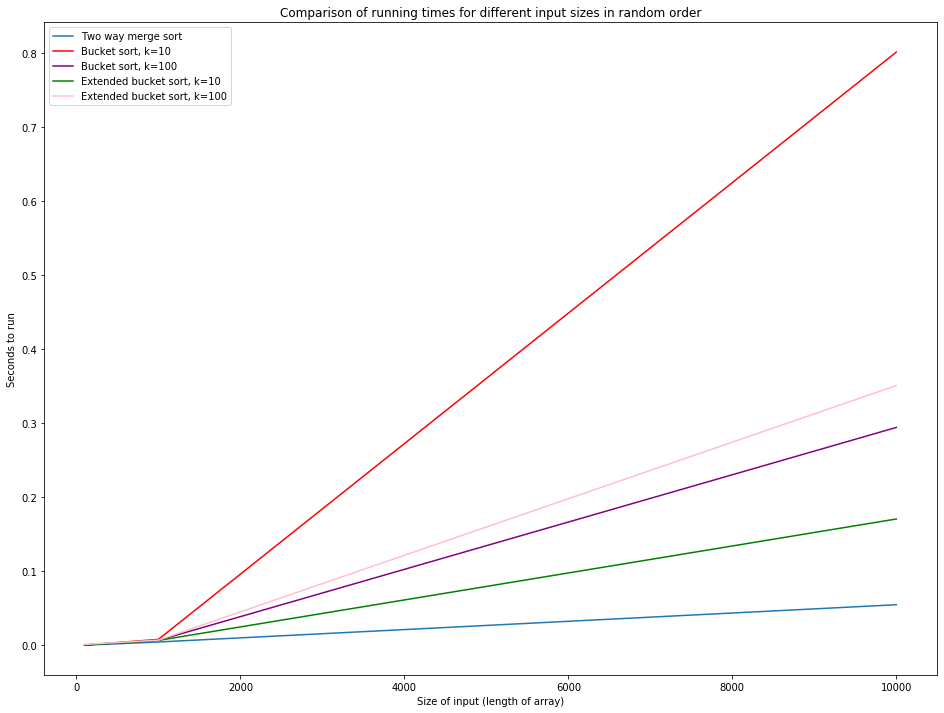

In [33]:
plt.figure(figsize=(16,12))
plt.title('Comparison of running times for different input sizes in random order')
x=[len(random_lists[0]), len(random_lists[1]),len(random_lists[2])]
plt.plot(x,two_way_time,label='Two way merge sort')
plt.plot(x,bucket_time_10, color='red',label='Bucket sort, k=10')
plt.plot(x,bucket_time_100, color='purple',label='Bucket sort, k=100')
plt.plot(x,extended_bucket_time_10, color='green',label='Extended bucket sort, k=10')
plt.plot(x,extended_bucket_time_100, color='pink',label='Extended bucket sort, k=100')
plt.legend()
plt.xlabel('Size of input (length of array)')
plt.ylabel('Seconds to run')
plt.show()

**Analysis:**

Again, the two way merge sort performs with O(n log n). The bucket sort and the extended bucket sort both perform at O(n^2), as the worst case scenario of both would be the same as a bubble sort (changing the position of each one of them within the buckets. It is important to acknowledge that the larger the amount of buckets (k) the more efficient the algorithm is, as it would be performing the bubble sort in each of the subarrays.

It is interesting to see the comparison between extended bucket sort and bucket sort in the graph above, which might be specific to the implementation I created in this aspect. In order to apply the recursive aspect of the extended bucket sort, I included an additional loop to this function such that it verifies whether all the elements are always being inputed to the same bucket, which created an infinity loop for edge cases such as [1,1,1,1] and k>2. I believe it is because of this loop that, as we increase the input size for the extended bucket size implementation, we get larger running times for higher k's (which is not the case for the bucket sort in its original scenario). 

What is interesting is that even the extended bucket sort with k=10 only performs slightly better than the two-way merge sort, which is a lot less complicated to implement than the extended bucket sort, both for reversed order and random order. 